<div align="right"><font size="3">
Erica Scaduto |
Due: May 17, 2020 </font>
</div>

<div align="center"> <font size="5">**STA 221: Homework 2** 
 </font></div>

**Supervised Learning Basics: 5 points** Answer true or false for each of the question below and give justiﬁcation.

(a) Gradient descent is a supervised learning algorithm. 

False

(b) Gradient descent is an algorithm to minimize or maximize a function. 

True

(c) Logistic regression cannot be performed after linear PCA. 

False

(d) Support vector machine is non-linear classiﬁcation algorithm. 

False

(e) A regression algorithm can be modiﬁed to be used for classiﬁcation as well.

True

**Generative Adversarial Networks (7.5 Points)** In this question, you will be required to read-up certain sections from the following textbook available online at http: //www.deeplearningbook.org and https://arxiv.org/pdf/1701.00160.pdf and answer the following questions in your own words. In your earlier courses, you might have come across maximum likelihood estimation (MLE) technique. To recall, MLE is a way to estimate the parameters of any parametric density. MLE is sometime referred to as explicit generative modeling technique as we have to state the speciﬁc parametric density (for example, Gaussian) that we are using to model the given data. Often times in practice, it becomes hard to pick the right density that ﬁts/models the data at hand. A recent proposal to overcome this issue is the so-called Generative Adversarial Networks (GAN). Here a generative model is developed for the dataset at hand, implicitly. That is, no speciﬁc parametric density is assumed. This technique is called as implicit generative modeling in the literature. In this question, you are required to write a 1-page report on GANs. Speciﬁcally, answer the following:

(a) Read section 3.13 from http://www.deeplearningbook.org/contents/prob.html. Then deﬁne and interpret Kullback-Leibler (KL) divergence in your own words. 

(b)  Read section 5.5 from http://www.deeplearningbook.org/contents/ml.html. What is the relationship between MLE and KL divergence ? Write in your own words. 

(c) Collectively summarize the issues with explicit density models from section 2.5 in https://arxiv.org/pdf/1701.00160.pdf). 

(d) Read section 3.1 and 3.2 on GAN. Explain what is the main idea behind GANs in your own words. Figure 12 is helpful for this. 

(e) In your own viewpoint, what are three drawbacks with GANs ?

**Boston Housing Prediction: 7.5 points** In this example, you will work with the Boston Housing Data set. The goal is to predict the median value of housing based on the values of 13 covariates. In the housing train.txt ﬁle, the ﬁrst 13 columns correspond to covariate (X ∈ Rd) and the last column corresponds to median value of housing (Y ∈ R). Assume that they you are using the model

Y = β>X = 13 X i=1 Xiβi

In [325]:
from sklearn.datasets import load_boston
import pandas as pd
# boston_dataset = load_boston()
# column_names = boston_dataset.feature_names
housing_train = pd.read_csv('housing_train.txt', sep='\s+', header=None, index_col=None)
X_train = housing_train.iloc[:, 0:13].values
y_train = housing_train.iloc[:, 13].values
print(X_train.shape, y_train.shape)

(433, 13) (433,)


a) Use linear regression on housing train.txt to estimate β (do not use housing test.txt). Calculate the mean square prediction error

In [327]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.intercept_
#Calculate the mean-square prediction error.

39.58432121803993

b)  Now use housing test.txt (note that this data was not used when estimating β) and the estimate for β from above to predict the housing prices in the test dataset. Calculate the mean-square prediction error.

In [329]:
housing_test = pd.read_csv('housing_test.txt', sep='\s+', header=None, index_col=None)
X_test = housing_test.iloc[:, 0:13].values
y_test = housing_test.iloc[:, 13].values
print(X_test.shape, y_test.shape)

(74, 13) (74,)


In [330]:
reg = LinearRegression().fit(X_test, y_test)
reg.intercept_
# Calculate the mean-square prediction error.

16.49370175397718

c) Change the model in Question 3, to

and repeat the same process in question 3. Note that this could still be considered as a linear model with data ˜ X = [X1,X2,...,X13,X2 1,X1X2,...,X2 13]. Does it give any improvement (in terms of mean squared prediction error) compared to the previous model from question 3 ?

**Amazon Review Classiﬁcation: 10 points** In this question, we will take use the preprocessed Amazon review data from HW2 (in both Document-Term matrix and TF-IDF matrix representation format) to do classiﬁcation.

In [181]:
# conda install pyreadr 
import pyreadr
data = pyreadr.read_r('Amazon.rdata')
print(data.keys()) 
amazonData = data['dat']
amazonData['review'] # access only review column 

odict_keys(['dat'])


0       My husband and I selected the Diaper "Champ" m...
1       I have had a diaper genie for almost 4 years s...
2       We loved this pail at first. The mechanism see...
3       Bad construction is my main issue. My husband ...
4       Diaper catches and jams in the well and that i...
                              ...                        
1307    Got this for a gift, not too expensive and the...
1308    Our previous Sony monitor\'s speaker unit was ...
1309    Don\'t waste your money on cheaper models. The...
1310    I bought this monitor for my third child.  I h...
1311    I went ahead and purchased the Sony Baby Call ...
Name: review, Length: 1312, dtype: category
Categories (1307, object): [, "Sophie the Giraffe" has tested positive for p..., "This gate expands from 29 to 52".  This is to..., (This is a long review, but if you read the wh..., ..., we are constantly having troubles with getting..., we bought it from amazon and had used it for o..., we bought this swing thinkin

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.snowball import EnglishStemmer 
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english") # changed to english based on review language
analyzer = CountVectorizer().build_analyzer() 

def stemmed_words(doc): 
    return (stemmer.stem(w) for w in analyzer(doc))
output = stemmed_words(df1.to_string())

In [52]:
import pandas as pd
# DocTermMatrix 
stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
DocTerm = stem_vectorizer.fit_transform(amazonData['review'])
DTDF = pd.DataFrame(DocTerm.toarray(), columns=stem_vectorizer.get_feature_names())
DocTermMatrix = DTDF.values
DTDF.head()

,00,000,08,09,10,100,1000,10oz,10x,11,...,yum,yup,yuppi,zantac,zero,zip,zola,zoli,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#TF-IDF matrix  
vectorizer = TfidfVectorizer(token_pattern='[a-z]{3,15}') # initiate TF-IDF vectorizer w/ token pattern 
Tfid = vectorizer.fit_transform(amazonData['review']) 
TfDF = pd.DataFrame(Tfid.toarray(), columns=vectorizer.get_feature_names())
TfidMatrix = TfDF.values
TfDF.head()

,ability,able,about,above,absolute,absolutely,absolutly,absorb,absorbing,absorbs,...,yup,yuppie,zantac,zero,zip,zola,zoli,zoo,zoom,zooms
0,0.0,0.000000,0.02966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.075259,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**a) How many reviews of each rating value are there in the entire dataset?**

In [15]:
print("Total # of reviews: ", len(amazonData['rating']))
print("Number of unique rating values: ", len(amazonData['rating'].unique())) # How many rating values are present in the dataset ?

# How many reviews of each rating value are there in the entire dataset? 
print("There are {} number of reviews with rating value of '1'".format(str(len(df1[amazonData['rating'] == 1]))))
print("There are {} number of reviews with rating value of '5'".format(str(len(df1[amazonData['rating'] == 5]))))

Total # of reviews:  1312
Number of unique rating values:  2
There are 656 number of reviews with rating value of '1'
There are 656 number of reviews with rating value of '5'


**Our goal is to build a classiﬁer that reads the review and classiﬁes whether the review was ”good” (rating = 5) or ”bad” (rating = 1). What is the best performance of a ”constant classiﬁer”, a classiﬁer that ignores the review and blindly assigns a constant classiﬁcation**

In [182]:
# Constant Classifier 
import numpy as np
from sklearn.dummy import DummyClassifier


DT_clf = DummyClassifier(strategy="constant", constant=1)
DT_clf.fit(DocTermMatrix, amazonData['rating'])
DT_clf.predict(DocTermMatrix)
DT_score = DT_clf.score(DocTermMatrix, amazonData['rating'])

TF_clf = DummyClassifier(strategy="constant", constant=5)
TF_clf.fit(TfidMatrix, amazonData['rating'])
TF_clf.predict(TfidMatrix)
TF_score = TF_clf.score(TfidMatrix, amazonData['rating'])
print("TFID constant classifier score: {}".format(str(TF_score)))
print("DocTerm constant classifier score: {}".format(str(DT_score)))

TFID constant classifier score: 0.5
DocTerm constant classifier score: 0.5


**b) Now we’ll run L1-regularized logistic regression on our dataset. Split the data into two parts: the training set (which is 70%) and testing set (which is the rest). Fit a L1-regularized logistic regression model by letting python chose the regularization parameter itself.**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [160]:
X = DocTermMatrix
y = amazonData['rating']
# Split the data into test and training sets, with 30% of samples being put into the test set
DT_X_train, DT_X_test, DT_y_train, DT_y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_clf = LogisticRegression(penalty='l1', solver='liblinear')
dt_clf.fit(DT_X_train, DT_y_train)
print('Coefficient of each feature:', dt_clf.coef_)
print('Training accuracy:', clf.score(DT_X_train, DT_y_train))

Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 0.9945533769063181


In [161]:
X = TfidMatrix
y = amazonData['rating']
# Split the data into test and training sets, with 30% of samples being put into the test set
TF_X_train, TF_X_test, TF_y_train, TF_y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tf_clf = LogisticRegression(penalty='l1', solver='liblinear')
tf_clf.fit(TF_X_train, TF_y_train)
print('Coefficient of each feature:', tf_clf.coef_)
print('Training accuracy:', tf_clf.score(TF_X_train, TF_y_train))

Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 0.8921568627450981


**c) How many covariates have non-zero coeﬃcients in the model selected by python ? List the twenty words with the most positive coeﬃcients and twenty words with most negative coeﬃcients.**

In [178]:
# Document Term 
DT_coef = pd.DataFrame()
DT_coef['Word'] = stem_vectorizer.get_feature_names()
DT_coef['Coef'] = dt_clf.coef_.tolist()[0]
positive_coef = DT_coef[DT_coef['Coef'] > 0]
print("There are {} covariates with non-zeo coefficients for DocumentTerm \n".format(len(positive_coef)))
pos20 = DT_coef.sort_values(by='Coef', ascending=False)[:20]
print("The 20 Top most positive coefficient for DocumentTerm are: {} \n".format(pos20['Word'].tolist()))
neg20 = DT_coef.sort_values(by='Coef', ascending=True)[:20]
print("The 20 Top most negative coefficient for DocumentTerm are: {}".format(neg20['Word'].tolist()))

There are 73 covariates with non-zeo coefficients for DocumentTerm 

The 20 Top most positive coefficient for DocumentTerm are: ['love', 'voic', 'teeth', 'great', 'those', 'soni', 'chew', 'gift', 'bath', 'easi', 'hear', 'recommend', 'sophi', 'perfect', 'grab', 'happi', 'well', 'wonder', 'other', 'pregnant'] 

The 20 Top most negative coefficient for DocumentTerm are: ['return', 'wast', 'four', 'won', 'less', 'until', 'not', 'stop', 'usual', 'diaper', 'them', 'review', 'after', 'useless', 'becaus', 'disappoint', 'gate', 'leak', 'husband', 'back']


In [179]:
# TFID 
TFID_coef = pd.DataFrame()
TFID_coef['Word'] = vectorizer.get_feature_names()
TFID_coef['Coef'] = tf_clf.coef_.tolist()[0]
positive_coef = TFID_coef[TFID_coef['Coef'] > 0]
print("There are {} covariates with non-zeo coefficients for TFID \n".format(len(positive_coef)))
pos20 = TFID_coef.sort_values(by='Coef', ascending=False)[:20]
print("The 20 Top most positive coefficient for TFID are: {} \n".format(pos20['Word'].tolist()))
neg20 = TFID_coef.sort_values(by='Coef', ascending=True)[:20]
print("The 20 Top most negative coefficient for TFID are: {}".format(neg20['Word'].tolist()))

There are 29 covariates with non-zeo coefficients for TFID 

The 20 Top most positive coefficient for TFID are: ['loves', 'love', 'sophie', 'teething', 'teether', 'great', 'loved', 'she', 'little', 'easy', 'toy', 'voice', 'gift', 'his', 'chew', 'sony', 'monitor', 'hear', 'static', 'her'] 

The 20 Top most negative coefficient for TFID are: ['not', 'after', 'diaper', 'waste', 'the', 'bottles', 'back', 'you', 'they', 'work', 'unit', 'was', 'gate', 'cup', 'stopped', 'returned', 'return', 'doesn', 'out', 'receievers']


**d) Now run the ﬁtted logisitic model on your testing data and report the misclassiﬁcation rate.**


In [174]:
from sklearn.metrics import confusion_matrix
TF_y_pred = tf_clf.predict(TF_X_test)
print('Training accuracy:', tf_clf.score(TF_X_test, TF_y_test))
tf_cm = confusion_matrix(TF_y_test, TF_y_pred, labels = [1,5])

print("Misclassification of 'BAD': ", tf_cm[1][0] / sum(tf_cm[1]))
print("Misclassification of 'GOOD': ", tf_cm[0][1] / sum(tf_cm[0]))
print("Total Misclassification Rate': ", (tf_cm[0][1] + tf_cm[1][0])  / (sum(tf_cm[0]) + sum(tf_cm[1])))

# 1-clf.score(X_test, y_test)

Training accuracy: 0.8959390862944162
Misclassification of 'BAD':  0.16751269035532995
Misclassification of 'GOOD':  0.04060913705583756
Total Misclassification Rate':  0.10406091370558376


In [175]:
DT_y_pred = dt_clf.predict(DT_X_test)
print('Training accuracy:', dt_clf.score(DT_X_test, DT_y_test))
dt_cm = confusion_matrix(DT_y_test,DT_y_pred, labels = [1,5])

print("Misclassification of 'BAD': ", dt_cm[1][0] / sum(dt_cm[1]))
print("Misclassification of 'GOOD': ", dt_cm[0][1] / sum(dt_cm[0]))
print("Total Misclassification Rate': ", (dt_cm[0][1] + dt_cm[1][0])  / (sum(dt_cm[0]) + sum(dt_cm[1])))

Training accuracy: 0.9086294416243654
Misclassification of 'BAD':  0.09644670050761421
Misclassification of 'GOOD':  0.08629441624365482
Total Misclassification Rate':  0.09137055837563451


[[189   8]
 [ 33 164]]


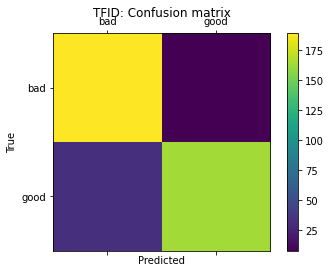

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
print(tf_cm)
labels = ['bad', 'good']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(tf_cm)
plt.title('TFID: Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[[180  17]
 [ 19 178]]


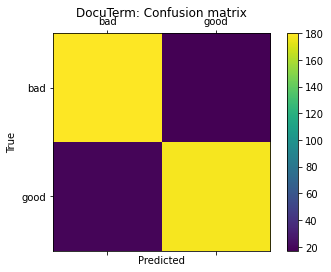

In [177]:
print(dt_cm)
labels = ['bad', 'good']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dt_cm)
plt.title('DocuTerm: Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**How does this compare with the “constant classiﬁer” we originally discussed before (i.e., is it better or worse)?**